# 15.18 (PROJECT: DETERMINE K IN K-MEANS CLUSTERING) 
In the k-NN classification example, we demonstrated hyperparameter tuning to choose the best value of k. In k-means clustering, a challenge is determining the appropriate k value for clustering the data. One technique for determining k is called the elbow method. Investigate the elbow method, then use it with the Digits and Iris datasets to determine whether this technique yields the correct number of classes for each dataset.

## Iris Dataset 
### Loading the Data


In [178]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import time


iris = load_iris()



In [179]:
iris.data.shape

(150, 4)

In [180]:

iris.target.shape

(150,)

In [181]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [182]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


### Exploring the Data

In [183]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


# iris.target is a list of integers representing the species
# target_names is a list of the species names
iris_df['species'] = [iris.target_names[i] for i in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [184]:
# the summary statistics for the non numerical features
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [185]:
# the summary statistics for the numerical features
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Using Kmeans Estimator

In [186]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=11)
km.fit(iris.data)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,11
,copy_x,True
,algorithm,'lloyd'


hen the training completes, the KMeans object contains:

A labels_ array with values from 0 to n_clusters - 1 (in this example, 0–2), indicating the clusters to which the samples belong.

A cluster_centers_ array in which each row represents a centroid.

In [187]:
print(km.labels_[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [188]:
print(km.labels_[50:100])

[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [189]:
print(km.labels_[100:150])

[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


In [190]:
y_pred = km.fit_predict(iris_df.drop(columns=['species']))
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [191]:
iris_df['cluster'] = y_pred

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [192]:
iris_df['cluster'].unique()
# unique cluster labels that the KMeans algorithm assigned.

array([0, 2, 1], dtype=int32)

In [193]:
df1 = iris_df[iris_df.cluster==0]
df2 = iris_df[iris_df.cluster==1]
df3 = iris_df[iris_df.cluster==2]

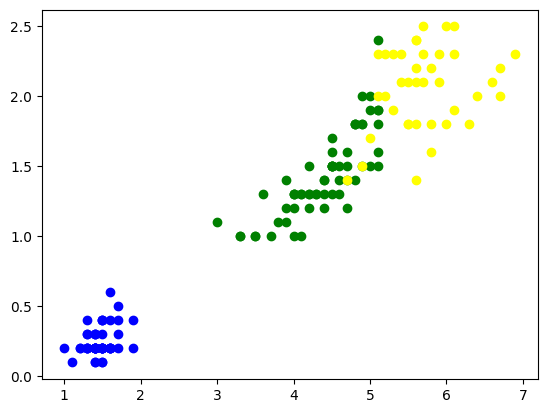

In [194]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

### Elbow Plot

In [195]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df.drop(columns=['species']))
    sse.append(km.inertia_)

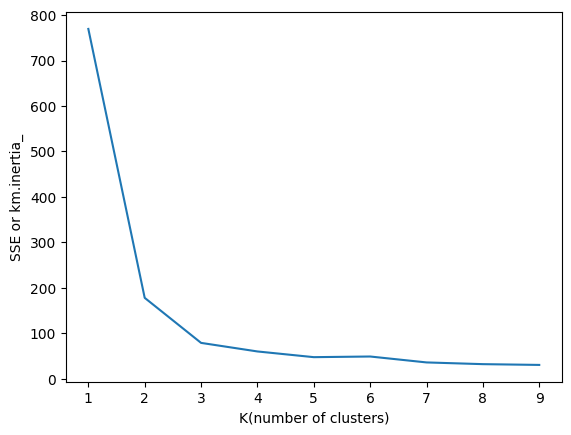

In [196]:
plt.xlabel('K(number of clusters)')
plt.ylabel('SSE or km.inertia_')
plt.plot(k_rng,sse)

# 15.21 (PROJECT: MULTI-CLASSIFICATION OF DIGITS WITH THE MNIST DATASET) 
In this chapter, we analyzed the Digits dataset that’s bundled with scikit-learn. This is a subset and simplified version of the original MNIST dataset, which provides 70,000 digit-image samples and targets. Each sample represents a 28-by-28 image (784 features). Reimplement this chapter’s digits classification case study using MNIST. You can download MNIST in scikit-learn using the following statements:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
Function fetch_mldata downloads datasets from mldata.org, which contains nearly 900 machine learning datasets and various ways to search them.

## Loading the Dataset


In [197]:
import time
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [198]:

mnist.data.shape


(70000, 784)

In [199]:
mnist.target.shape

(70000,)

## Train and Split Data

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

## Standard Scaler

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

## Logistic Regression without PCA

In [202]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
logistic_reg = LogisticRegression(solver='lbfgs')
logistic_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [203]:
y_pred = logistic_reg.predict(X_test)
end_time = time.time()
print(y_pred)

['0' '3' '8' ... '7' '3' '0']


### Accuaracy Score

In [204]:
logistic_reg.score(X_test, y_test)

0.919

In [205]:
time_without_PCA = end_time - start_time
time_without_PCA

13.672732830047607

## Logistic Regression with PCA

## Dimensionality Reduction with Principal Component Analysis

### Creating PCA object

In [206]:
from sklearn.decomposition import PCA
start_time_PCA = time.time()
pca = PCA(n_components=0.95, random_state=11)
pca.fit(mnist.data)

,n_components,0.95
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,11


In [207]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca.shape, X_test_pca.shape

((56000, 328), (14000, 328))

In [208]:

logistic_reg_PCA = LogisticRegression(solver='lbfgs' )
logistic_reg_PCA.fit(X_train_pca, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [209]:
y_pred_PCA = logistic_reg_PCA.predict(X_test_pca)
end_time_PCA = time.time()

y_pred_PCA

array(['0', '3', '8', ..., '7', '3', '0'], shape=(14000,), dtype=object)

In [210]:
time_PCA = end_time_PCA - start_time_PCA
time_PCA

8.022944927215576

In [211]:
logistic_reg_PCA.score(X_test_pca, y_test)

0.9226428571428571

### Summary 

In [212]:
print("Summary:  ")
print(f"Original Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Original Test Set Shape: {X_test.shape}, {y_test.shape}")
print(f"Scaled Training Set Shape: {X_train_scaled.shape}, {y_train.shape}")
print(f"Scaled Test Set Shape: {X_test_scaled.shape}, {y_test.shape}")
print(f"PCA Training Set Shape: {X_train_pca.shape}")
print(f"PCA Test Set Shape: {X_test_pca.shape}")
print(f"Logistic Regression (PCA) Accuracy: {logistic_reg_PCA.score(X_test_pca, y_test)}")
print(f"Logistic Regression (No PCA) Accuracy: {logistic_reg.score(X_test, y_test)}")



print("Time Comparison:  ")
print(f"Time taken without PCA: {time_without_PCA} seconds")
print(f"Time taken with PCA: {time_PCA} seconds")


Summary:  
Original Training Set Shape: (56000, 784), (56000,)
Original Test Set Shape: (14000, 784), (14000,)
Scaled Training Set Shape: (56000, 784), (56000,)
Scaled Test Set Shape: (14000, 784), (14000,)
PCA Training Set Shape: (56000, 328)
PCA Test Set Shape: (14000, 328)
Logistic Regression (PCA) Accuracy: 0.9226428571428571
Logistic Regression (No PCA) Accuracy: 0.919
Time Comparison:  
Time taken without PCA: 13.672732830047607 seconds
Time taken with PCA: 8.022944927215576 seconds
